# Roteiro
1. Definir o conjunto de dados
2. Definir as funções de pertinência
3. Calcular o grau de ativação dos antecedentes (W) (Grau de ativação das funções de pertinência)
4. Calcular a saída de cada regra (mínimo) (antecedente -> consequente)
5. Agregar as saídas das regras (maximo)
6. Defuzzificação - saída com valor numérico 
 
Fazer as etapas 3 a 6 para cada um dos pontos




In [ ]:
! pip install scikit-fuzzy >> /dev/null

/content/drive/MyDrive/Colab Notebooks
[NbConvertApp] Converting notebook Mandami.ipynb to latex
[NbConvertApp] Support files will be in Mandami_files/
[NbConvertApp] Making directory Mandami_files
[NbConvertApp] Making directory Mandami_files
[NbConvertApp] Making directory Mandami_files
[NbConvertApp] Writing 32888 bytes to Mandami.tex


## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

## Definindo dados de entrada

In [ ]:
# np.linspace(a,b,point_n) define point_n points in range of a b
point_n = 100
x = np.linspace(-10,10,point_n)
y = np.linspace(0,10,point_n)

## Definindo função de pertinencia

In [ ]:
# Funcao de ativacao
def trapezoidal(x:float,a:float,m:float,n:float,b:float):
  return max(min((x - a) / (m - a) , 1 , (b - x) / (b - n)) , 0)
def trapezoidal(x, vet):
    return max(min((x-vet[0])/(vet[1]-vet[0]),1,(vet[3]-x)/(vet[3]-vet[2])),0)


## Definindo função antecedente

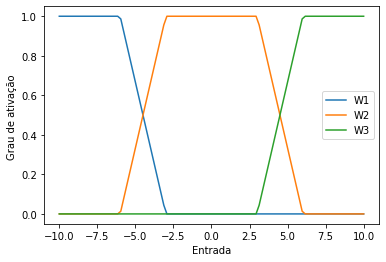

In [ ]:
ante_param = np.array([[-20,-15,-6,-3],[-6,-3,3,6],[ 3 ,6 ,15 ,20]])
W=[]
for i in ante_param:
  row = []
  for j in x:
    row.append(trapezoidal(j,i))
  W.append(row)
plt.plot(x, W[0], label="W1")
plt.plot(x, W[1], label="W2")
plt.plot(x, W[2], label="W3")
plt.plot()

plt.xlabel("Entrada")
plt.ylabel("Grau de ativação ")
plt.legend()
plt.show()

## Definindo função consequente

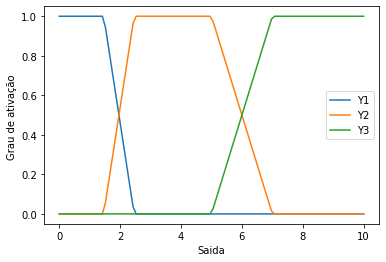

In [ ]:
cons_param = [[-2.46 ,-1.46 ,1.46 ,2.46],[1.46, 2.46, 5 ,7],[5, 7, 13, 15]]
yW=[]
for i in cons_param:
  row = []
  for j in y:
    row.append(trapezoidal(j,i))
  yW.append(row)


plt.plot(y, yW[0], label="Y1")
plt.plot(y, yW[1], label="Y2")
plt.plot(y, yW[2], label="Y3")


plt.xlabel("Saida")
plt.ylabel("Grau de ativação ")
plt.legend()
plt.show()


## Aplicando regras e agregar as saídas
As funções de ativação são definidas como:
 
Quando x $\in$ A1 $→$ y $\in$ C3 \\
Quando x $\in$ A2 $→$ y $\in$ C2 \\
Quando x $\in$ A3 $→$ y $\in$ C1




In [ ]:
defuzz_points =[]
for i in range(point_n):
  C=[[],[],[]]
  agreg_out = []
  for j in range(point_n):
    aux1 = min(W[0][i],yW[2][j])
    aux2 = min(W[1][i],yW[1][j])
    aux3 = min(W[2][i],yW[0][j])
    C[0].append(aux1)
    C[1].append(aux2)
    C[2].append(aux3)
    agreg_out.append(max(C[0][j],C[1][j],C[2][j]))
  defuzz_points.append(fuzz.defuzz(x, np.array(agreg_out), 'lom'))



# Defuzzificação - Gráfico
 
A defuzzificação foi feita utilizando o método "lom" da biblioteca scikit, que utiliza o máximo dos mínimos.

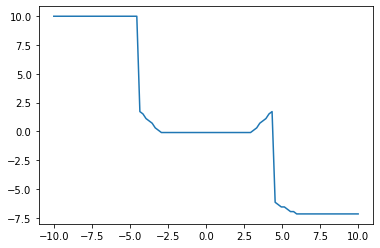

In [ ]:
plt.plot(x,defuzz_points)
plt.show()